スクラッチの意義

ここでのスクラッチとは、NumPyなどの基本的なライブラリを組み合わせることで、scikit-learnのような応用的なライブラリと同じ機能のクラス・関数を自作することを指します。


スクラッチをすることでscikit-learnなどのライブラリを動かすだけでは掴みづらい、アルゴリズムの深い理解を目指します。コーディングのスキル向上も兼ねますが、それは主な目的ではありません。


以下のような効果を狙っています。

・新たな手法に出会った時に理論・数式を理解しやすくする
・ライブラリを使う上での曖昧さを減らす
・既存の実装を読みやすくする

【問題1】train_test_splitのスクラッチ

スクラッチの練習として、scikit-learnのtrain_test_splitを自作してみます。以下の雛形をベースとして関数を完成させてください。


sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation


なお、作成した関数がscikit-learnのtrain_test_splitと同じ動作をしているか必ず確認をするようにしましょう。



In [135]:
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.datasets import load_iris
from random import randrange

In [311]:
def check(X, y, train_size):
    assert (type(X) == np.ndarray or type(X) == pd.DataFrame or isinstance(y, list)),"Xはnumpy配列かデータフレームか配列で"
    assert (type(X) == np.ndarray or type(X) == pd.DataFrame or isinstance(y, list)),"yはnumpy配列かデータフレームか配列で"
    assert len(X) != len(y), "Xとyの数が合わない"
    assert type(train_size) != float, "train_sizeはfloatで0.0と1.0の間"

In [312]:
#うまくできなかったためコメントアウト

# def scratch_train_test_split(X, y, train_size):
#     """
#     検証データを分割する。

#     Parameters
#     ----------
#     X : 次の形のndarray, shape (n_samples, n_features)
#       訓練データ
#     y : 次の形のndarray, shape (n_samples, )
#       正解値
#     train_size : float (0<train_size<1)
#       何割をtrainとするか指定

#     Returns
#     ----------
#     X_train : 次の形のndarray, shape (n_samples, n_features)
#       訓練データ
#     X_test : 次の形のndarray, shape (n_samples, n_features)
#       検証データ
#     y_train : 次の形のndarray, shape (n_samples, )
#       訓練データの正解値
#     y_test : 次の形のndarray, shape (n_samples, )
#       検証データの正解値
#     """
#     X_train = list()
#     y_train = list()
#     train_size = train_size * len(X)
#     X_copy = list(X)
#     y_copy = list(y)
    
#     while len(X_train) < train_size:
#         index = randrange(len(X_copy))
#         X_train.append(X_copy.pop(index))
#         y_train.append(y_copy.pop(index))

#     return X_train, X_test, y_train, y_test

In [313]:
def scratch_train_test_split(X, y, train_size=0.8, random_state=None):
    """
    検証データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      訓練データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
      
      参考　https://stackoverflow.com/questions/58374049/split-a-list-with-a-adjustable-ratio
      
    """
    #チェック
    che(X,y,train_size)
    
    if random_state == None:
        np.random.seed()
    else:
        np.random.shuffle(X)
        np.random.shuffle(y)
    
    
    elements_X = len(X)
    #データ数
    division_X = int(elements_X * (train_size))
    #division_Xの比率でリストを分割
    X_train, X_test = X[:division_X], X[division_X:]

    elements_y = len(y)
    #データ数
    division_y = int(elements_y * (train_size))
    #division_yの比率でリストを分割
    y_train, y_test = y[:division_y], y[division_y:]
    
    return X_train, X_test, y_train, y_test

In [315]:
# scratch_train_test_split(1, y, train_size=0.8)
scratch_train_test_split(np.array([1,2,3]), 3, train_size=0.8)
scratch_train_test_split([1,2,3], np.array([1,2]), train_size=0.8)

TypeError: object of type 'int' has no len()

In [299]:
#list(range())にしないとうまく表示されない
X, y = np.arange(10).reshape((5, 2)), list(range(5))
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[0 1]
 [2 3]
 [4 5]
 [6 7]]
[[8 9]]
[0, 1, 2, 3]
[4]


In [300]:
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[8 9]
 [0 1]
 [6 7]
 [4 5]]
[[2 3]]
[4, 0, 3, 2]
[1]


##scikit-learnを用いて機械学習を行うコードを作成

scikit-learnを使ったコードを作成していきます。


検証データの分割には問題1で作成した自作の関数を用いてください。クロスバリデーションではなくホールドアウト法で構いません。

##分類問題

分類は3種類の手法をスクラッチします。


・ロジスティック回帰

・SVM

・決定木

ロジスティック回帰はscikit-learnにおいてLogisticRegressionクラスとSGDClassifierクラスの2種類から使用できます。ここでは勾配降下法を用いて計算するSGDClassifierクラスを利用してください。引数でloss="log"とすることでロジスティック回帰の計算になります。


sklearn.linear_model.SGDClassifier — scikit-learn 0.21.3 documentation

sklearn.svm.SVC — scikit-learn 0.21.3 documentation

sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation

データセットは3種類用意します。


1つ目は事前学習期間同様にirisデータセットです。


sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation


2値分類としたいため、以下の2つの目的変数のみ利用します。特徴量は4種類全て使います。


virgicolorとvirginica

残り2つは特徴量が2つのデータセットを人工的に用意します。以下のコードで説明変数X,目的変数yが作成可能です。「シンプルデータセット1」「シンプルデータセット2」とします。特徴量が2つであるため可視化が容易です。



シンプルデータセット1作成コード
            
    import numpy as np
    np.random.seed(seed=0)
    n_samples = 500
    f0 = [-1, 2]
    f1 = [2, -1]
    cov = [[1.0,0.8], [0.8, 1.0]]
    f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
    f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
    X = np.concatenate((f0, f1))
    y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
    random_index = np.random.permutation(np.arange(n_samples))
    X = X[random_index]
    y = y[random_index]

シンプルデータセット2作成コード

    X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
           [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
           [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
           [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
           [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
           [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
           [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
           [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
           [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
           [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
           [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
           [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
           [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
           [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
           [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
           [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
           [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
           [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
           [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
           [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
    y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])



##【問題2】 分類問題を解くコードの作成

上記3種類の手法で3種類のデータセットを学習・推定するコードを作成してください。

In [561]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [562]:
data = load_iris()

#データ作成
X = pd.DataFrame(data=data.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(data=data.target, columns=['Species'])

df = pd.concat([X, y], axis=1)
df = df.query('Species==[1, 2]')

ir_X = np.array(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
ir_y = np.array(df[['Species']])

In [563]:
#シンプル１
import numpy as np
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
sim_X = X[random_index]
sim_y = y[random_index]

In [564]:
#シンプル２
sim_X2 = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
sim_y2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

1 ロジスティック回帰の場合

In [567]:
def logistic(X, y, train_size=0.8):
    X_train, X_test, y_train, y_test = scratch_train_test_split(X, y)
    #1次元化
    y_train = np.reshape(y_train,(-1))
    y_test = np.reshape(y_test,(-1))
    
    #標準化
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #学習
    sg = SGDClassifier(loss="log")
    sg.fit(X_train_scaled, y_train)
    
    #推定
    sg_pred = sg.predict(X_test_scaled)
    
    return print("正解率:{}".format(metrics.accuracy_score(y_test ,sg_pred)))

In [574]:
logistic(ir_X, ir_y)

正解率:0.95


In [575]:
logistic(sim_X, sim_y)

正解率:1.0


In [576]:
logistic(sim_X2, sim_y2)

正解率:0.5


2. SVMの場合

In [592]:
def svm(X, y, train_size=0.8):
    X_train, X_test, y_train, y_test = scratch_train_test_split(X, y)
    #1次元化
    y_train = np.reshape(y_train,(-1))
    y_test = np.reshape(y_test,(-1))
    
    #標準化
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #学習
    svc = SVC(gamma='scale')
    svc.fit(X_train_scaled, y_train)
    
    #推定
    svc_pred = svc.predict(X_test_scaled)
    
    return print("正解率:{}".format(metrics.accuracy_score(y_test , svc_pred)))

In [593]:
svm(ir_X, ir_y)
svm(sim_X, sim_y)
svm(sim_X2, sim_y2)

正解率:0.9
正解率:1.0
正解率:0.125


3. 決定木の場合

In [629]:
def dtc(X, y):
    
#ラベルとサンプル数が合わなくなるので
#     X_train, X_test, y_train, y_test = scratch_train_test_split(X, y)
#     #1次元化
#     y_train = np.reshape(y_train,(-1))
#     y_test = np.reshape(y_test,(-1))
    
#     #標準化
#     scaler = StandardScaler()
#     scaler.fit(X_train)
#     X_train_scaled = scaler.transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

    #学習
    dtc = DecisionTreeClassifier(max_depth=3)
    dtc.fit(X, y)
    
    #推定
    dtc_pred = dtc.predict(X)
    
    return print("正解率:{}".format(metrics.accuracy_score(y , dtc_pred)))

In [630]:
dtc(ir_X, ir_y)
dtc(sim_X, sim_y)
dtc(sim_X2, sim_y2)

正解率:0.99
正解率:1.0
正解率:0.8


結果

シンプルコード2の正解率が低い

##回帰問題

回帰は1種類をスクラッチします。

・線形回帰


線形回帰は勾配降下法を用いて計算するSGDRegressorクラスを利用してください。


sklearn.linear_model.SGDRegressor — scikit-learn 0.21.3 documentation


データセットは事前学習期間同様にHouse Pricesコンペティションのものを使います。


House Prices: Advanced Regression Techniques


train.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使います。

##【問題3】 回帰問題を解くコードの作成

線形回帰でHouse Pricesデータセットを学習・推定するコードを作成してください。

In [637]:
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [632]:
df = pd.read_csv('C:/Users/iwaju/Desktop/Python/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [642]:
#copy()をしないとSettingWithCopyWarningが発生
df_sel = df[['GrLivArea', 'YearBuilt', 'SalePrice']].copy()
df_sel

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


In [643]:
df_sel.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


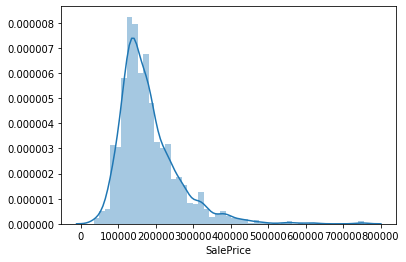

In [644]:
#分析
sns.distplot(df_sel["SalePrice"])

In [645]:
print("Kurtosis(尖度)  :", df_sel["SalePrice"].kurt())
print("Skewness(歪度)  :", df_sel["SalePrice"].skew())

Kurtosis(尖度)  : 6.536281860064529
Skewness(歪度)  : 1.8828757597682129


In [646]:
#対数変換
df_sel['SalePrice'] = df_sel['SalePrice'].apply(np.log)
df_sel['SalePrice'].head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

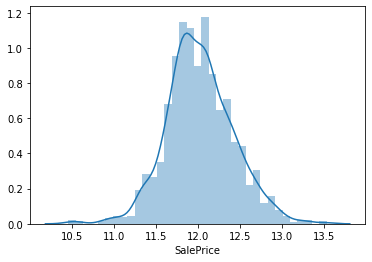

In [647]:
sns.distplot(df_sel["SalePrice"])

In [648]:
print("Kurtosis(尖度)  :", df_sel["SalePrice"].kurt())
print("Skewness(歪度)  :", df_sel["SalePrice"].skew())

Kurtosis(尖度)  : 0.8095319958036296
Skewness(歪度)  : 0.12133506220520406


In [650]:
#前処理
X = np.array(df[["GrLivArea","YearBuilt"]])
y = np.array(df['SalePrice'])

X_train, X_test, y_train, y_test = scratch_train_test_split(X, y)

# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 2)
(292, 2)
(1168,)
(292,)


In [651]:
#標準化
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

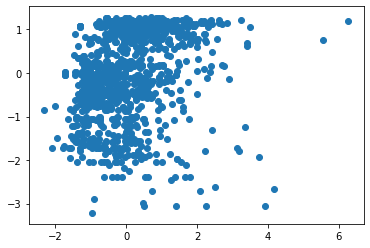

In [652]:

plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1])

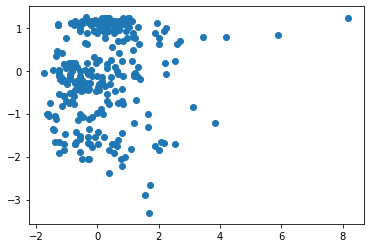

In [653]:
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1])

In [658]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#関数定義
def test_train(X_train, X_test, y_train, y_test,model):
    #yを1次元に
    model.fit(X_train_scaled, y_train.ravel())
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print("MSE:{}".format(mse))
    print("MAE:{}".format(mean_absolute_error(y_test, y_pred)))
    print("RMSE:{}".format(np.sqrt(mse)))
    print("R2:{}".format(r2_score(y_test, y_pred)))
    plt.scatter(y_pred, y_pred - y_test)
    #水平線
    plt.hlines(y = 0, xmin = min(y_pred), xmax = max(y_pred), color='black')
    plt.grid()
    plt.show()

MSE:2961272604.4625497
MAE:34143.66348547404
RMSE:54417.57624575491
R2:0.5583729435203568


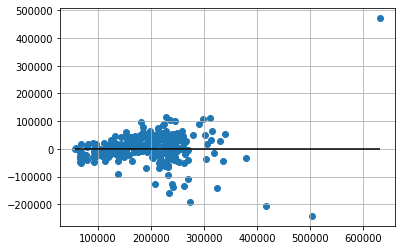

In [659]:
sggr = SGDRegressor()

test_train(X_train, X_test, y_train, y_test,sggr)